# Assignment-2 : Applying T-SNE on Amazon Food Review Dataset

In [1]:
# Importing all the necessary libraries

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer

from nltk.stem.porter import PorterStemmer

import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer


from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle


from tqdm import tqdm
import os

C:\Users\User\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


### Declaration
I am using the cleaned version of review text, stored in 'final.sqlite'

In [18]:
if os.path.isfile('final.sqlite'):
    conn = sqlite3.connect('final.sqlite')
    final = pd.read_sql_query("SELECT * FROM Reviews WHERE Score != 3 ", conn)
    conn.close()
else:
    print("Please the above cell")

In [19]:
# Extracting equal number of random sample of positive and negative score

dfn=final[final.Score==0].sample(n=2500)
dfp=final[final.Score==1].sample(n=2500)
print("Shape of Data \n",dfn.shape,dfp.shape,sep="\n")


Shape of Data 

(2500, 12)
(2500, 12)


In [20]:
# Concatenating positive and negative score DataFrame into one DataFrame
frames=[dfp,dfn]
new_df=pd.concat(frames)
new_df.shape

(5000, 12)

In [21]:
# Displaying two Value of DataFrame
new_df.head(2)

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
146453,111472,120950,B001682QB6,A263P6XITBM46F,"Davina Hammel ""Delilahlala""",2,2,1,1249430400,SCRUMPTIOUS !,Used to buy this excellent soup in larger cans...,use buy excel soup larger can live albani prob...
310870,322139,348704,B004GWSWCQ,A1IU7S4HCK1XK0,Joanna Daneman,5,5,1,1319068800,Ok! I'm impressed! Great office coffee,"We serve office visitors tea, coffee, water or...",serv offic visitor tea coffe water soft drink ...


# Bag Of Words

1. To perform Bag of Words CountVectorizer() function is used.

2. It convert a collection of text documents to a matirx of token counts.

3. It returns sparse matrix which contain that (row no , column no and value) corresponding to non zero value in matrix.

4. Example

   [0 0 3 0 4
   
    0 0 5 7 0
   ]
   
   Row No     0 0 1 1
   
   Column No   2 4 2 3
   
   Value    3 4 5 7
   
5. Representing a sparse matrix by a 2D array leads to wastage of lots of memory as zeroes in the matrix are of no use in most of the cases. So, instead of storing zeroes with non-zero elements, we only store non-zero elements.

In [22]:
count_vect=CountVectorizer()
Bow_counts=count_vect.fit_transform(new_df['CleanedText'].values)
print("the type of count vectorizer ",type(Bow_counts))
print("\nthe shape of out text BOW vectorizer ",Bow_counts.get_shape())
print("\nthe number of unique words ", Bow_counts.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>

the shape of out text BOW vectorizer  (5000, 9894)

the number of unique words  9894


In [23]:
# Converting Sparse matrix to Dense Matrix 
y=Bow_counts.todense()

In [24]:
# Displaying the shape
y.shape

(5000, 9894)

#  Applying TSNE On Bag Of Words Data

In [31]:
from sklearn.manifold import TSNE
model= TSNE(n_components=2,random_state=0,perplexity=30)
tsne_data= model.fit_transform(y)

In [32]:
# Checking Shape of Data
tsne_data.shape

(5000, 2)

In [33]:
# Extracting Label from Data 

label = new_df['Score']

# Checking Shape of Label
label.shape

(5000,)

In [34]:
# Adding Label to data obtained after applying TSNE

data = np.vstack((tsne_data.T,label)).T

# Checking Shape of Data
data.shape

(5000, 3)

In [35]:
# Creating DataFrame from data obtained after Adding Label To Data obtained after applying TSNE
BOW_df=pd.DataFrame(data,columns=['X','Y','Label'])

# Counting different types of label

BOW_df['Label'].value_counts()

0.0    2500
1.0    2500
Name: Label, dtype: int64

#  TSNE Plot On Bag Of Words

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


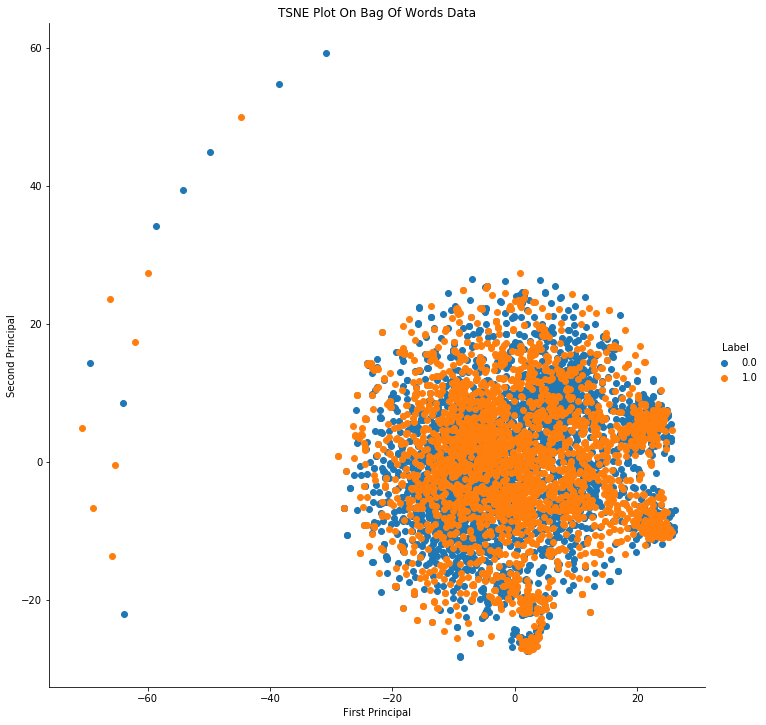

In [36]:
# Plotting 

sns.FacetGrid(data=BOW_df,hue='Label',size=10).map(plt.scatter,'X','Y').add_legend()
plt.title("TSNE Plot On Bag Of Words Data")
plt.xlabel("First Principal")
plt.ylabel("Second Principal")
plt.show()

.
# TF-IDF

In [37]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
final_tf_idf = tf_idf_vect.fit_transform(new_df['CleanedText'].values)
print("The type of count vectorizer ",type(final_tf_idf))
print("The shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("The number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

The type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
The shape of out text TFIDF vectorizer  (5000, 142998)
The number of unique words including both unigrams and bigrams  142998


In [38]:
# Tranforming Sparse Matrix to Dense Matrix
y = final_tf_idf.todense()
y.shape

(5000, 142998)

#  Applying TSNE On TF-IDF Data

In [ ]:
from sklearn.manifold import TSNE
model=TSNE(n_components=2,random_state=0)
tsne_data= model.fit_transform(y)

In [74]:
label = new_df['Score']
data = np.vstack((tsne_data.T,label)).T
TFIDF_df=pd.DataFrame(data,columns=['X','Y','Label'])
TFIDF_df['Label'].value_counts()

0.0    2500
1.0    2500
Name: Label, dtype: int64

#  TSNE Plot On TF-IDF

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


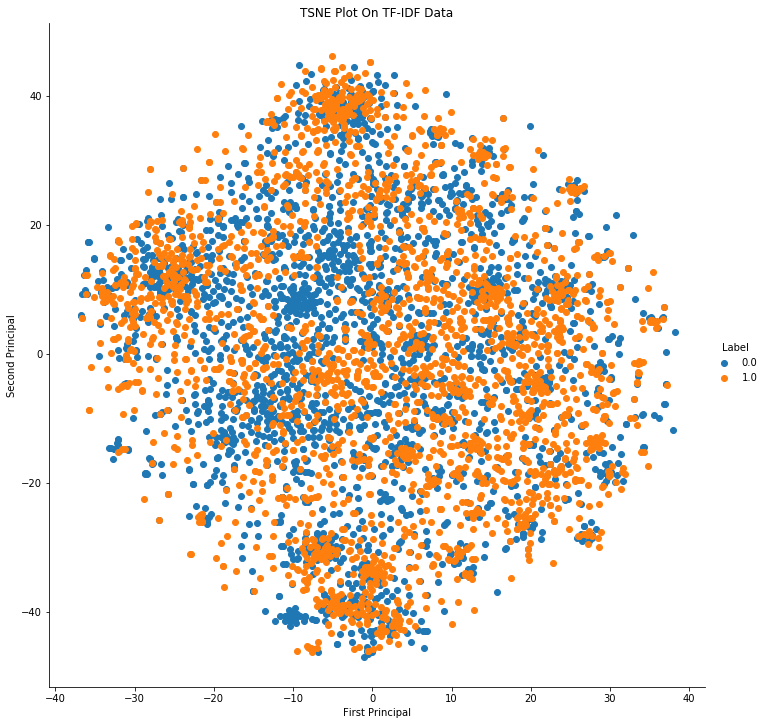

In [34]:
sns.FacetGrid(data=TFIDF_df,hue='Label',size=10).map(plt.scatter,'X','Y').add_legend()
plt.title("TSNE Plot On TF-IDF Data")
plt.xlabel("First Principal")
plt.ylabel("Second Principal")
plt.show()

#  Word-To-Vector

In [21]:
# Loading Google News Word2Vector

Ram_gt_16GB=True
want_to_read_sub_set_of_google_w2v = True
want_to_read_whole_google_w2v = True

if not Ram_gt_16GB:
    if want_to_read_sub_set_of_google_w2v and  os.path.isfile('/content/drive/My Drive/AmazonFineFoodReviews/google_w2v_for_amazon.pkl'):
        with open('/content/drive/My Drive/AmazonFineFoodReviews/google_w2v_for_amazon.pkl', 'rb') as f:
            # model is dict object, you can directly access any word vector using model[word]
            model = pickle.load(f)
else:
    if want_to_read_whole_google_w2v and os.path.isfile('/content/drive/My Drive/Colab Notebooks/GoogleNews-vectors-negative300.bin'):
        model = KeyedVectors.load_word2vec_format('/content/drive/My Drive/Colab Notebooks/GoogleNews-vectors-negative300.bin', binary=True)
         

In [22]:
# Training Word2Vec model using own text corpus
i=0
list_of_sent=[]
for sent in new_df['CleanedText']:
    list_of_sent.append(sent.split())

In [46]:
print(new_df['CleanedText'].values[0])
print("*****************************************************************")
print(list_of_sent[1:3])

make milk water tsp vanilla brown sugar cook minut love
*****************************************************************
[['ive', 'order', 'often', 'subscrib', 'save', 'item', 'anoth', 'review', 'comment', 'beat', 'price', 'anywher', 'els', 'happen', 'subscrib', 'save', 'option', 'retail', 'amazon', 'longer', 'sell', 'coffe', 'great', 'price'], ['review', 'perspect', 'understand', 'vegan', 'cooki', 'would', 'tast', 'differ', 'ordinari', 'cooki', 'even', 'though', 'vegan', 'curious', 'intrigu', 'healthi', 'benefit', 'natur', 'cooki', 'protein', 'tri', 'chocol', 'chip', 'flavor', 'impress', 'textur', 'like', 'cooki', 'soft', 'chewi', 'tast', 'mediocr', 'consid', 'cooki', 'pack', 'total', 'calori', 'would', 'say', 'would', 'rather', 'eat', 'chocol', 'chip', 'cooki', 'made', 'dairi', 'product', 'one', 'great', 'altern', 'vegan', 'though']]


In [47]:
# min_count = 5 considers only words that occured atleast 5 times
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)

In [48]:
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:10])

number of words that occured minimum 5 times  3430
sample words  ['make', 'milk', 'water', 'tsp', 'vanilla', 'brown', 'sugar', 'cook', 'minut', 'love']


In [49]:
w2v_model.wv.most_similar('tasti')

[('chewi', 0.9993305206298828),
 ('coat', 0.999264121055603),
 ('actual', 0.9991971850395203),
 ('pasta', 0.9990626573562622),
 ('nut', 0.998927116394043),
 ('crunch', 0.99879390001297),
 ('altern', 0.9987667202949524),
 ('dip', 0.9986828565597534),
 ('raisin', 0.9985899329185486),
 ('chunk', 0.9985791444778442)]

#  Applying TSNE On Word-To-Vector

In [53]:
token=[]
label=[]

for word in w2v_model.wv.vocab :
    token.append(w2v_model[word])
    label.append(word)
    
print(len(token))    

3430


In [56]:
from sklearn.manifold import TSNE
model=TSNE(perplexity=100,n_components=2,random_state=0)
tsne_data=model.fit_transform(token)

#  TSNE Plot On Word-To-Vector

In [57]:
x = []
y = []
for value in tsne_data:
    x.append(value[0])
    y.append(value[1])
        

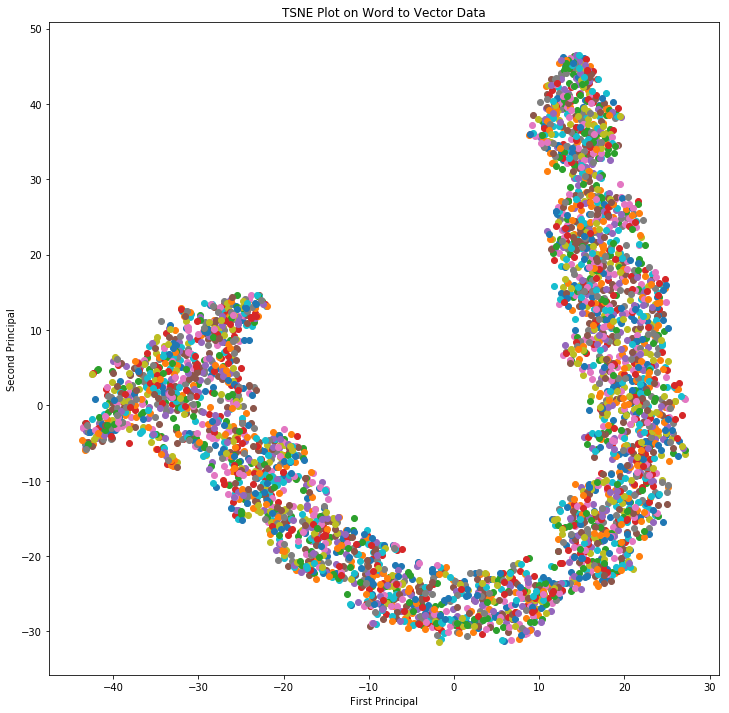

In [58]:
plt.figure(figsize=(12, 12)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
plt.title("TSNE Plot on Word to Vector Data") 
plt.xlabel("First Principal")
plt.ylabel("Second Principal")
plt.show()


#  Average Word to Vector

1. Let r1 is review of a given corpus


2. r1 : w1 w2  w3 w4 w5.....wn


3. Average w2v for r1=V1=(w2v(w1)+w2v(w2)+.....+w2v(wn))/n

In [59]:
sent_vectors = []; # List containing the avg-w2v for each sentence/review is stored in this list

for sent in tqdm(new_df['CleanedText']):
    
    sent_vec = np.zeros(50) # Initialisation of vector so that we could add
    cnt_words =0; # counting num of words with a valid vector in the sentence/review
    for word in sent.split(): 
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

100%|█████████████████████████████████████| 5000/5000 [00:05<00:00, 901.86it/s]


5000
50


#  Applying TSNE On Average Word-To-Vector

In [60]:
from sklearn.manifold import TSNE
model=TSNE(n_components=2,random_state=0)
tsne_data= model.fit_transform(sent_vectors)

In [61]:
tsne_data.shape

(5000, 2)

#  TSNE Plot On Average Word-To-Vector

In [62]:
x = []
y = []
for value in tsne_data:
    x.append(value[0])
    y.append(value[1])
        

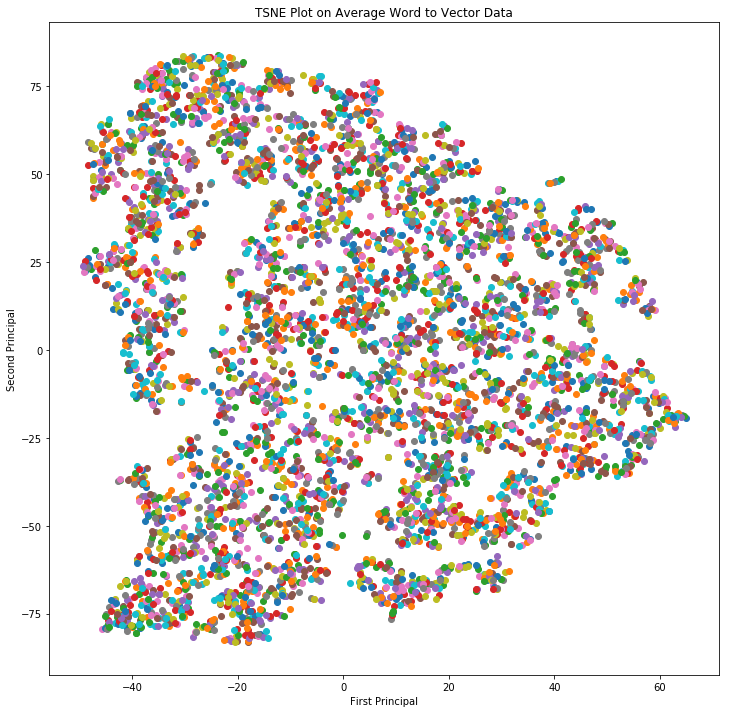

In [64]:
plt.figure(figsize=(12, 12)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
plt.title("TSNE Plot on Average Word to Vector Data") 
plt.xlabel("First Principal")
plt.ylabel("Second Principal")
plt.show()


# 9.0 TF-IDF Word-To-Vector

In [66]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(new_df['CleanedText'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [67]:
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

100%|█████████████████████████████████████| 5000/5000 [00:07<00:00, 703.56it/s]


#  Applying TSNE On TF-IDF Word-To-Vector

In [68]:
from sklearn.manifold import TSNE
model=TSNE(n_components=2,random_state=0)
tsne_data= model.fit_transform(sent_vectors)

# TSNE Plot On TF-IDF Word-To-Vector

In [71]:
x = []
y = []
for value in tsne_data:
    x.append(value[0])
    y.append(value[1])

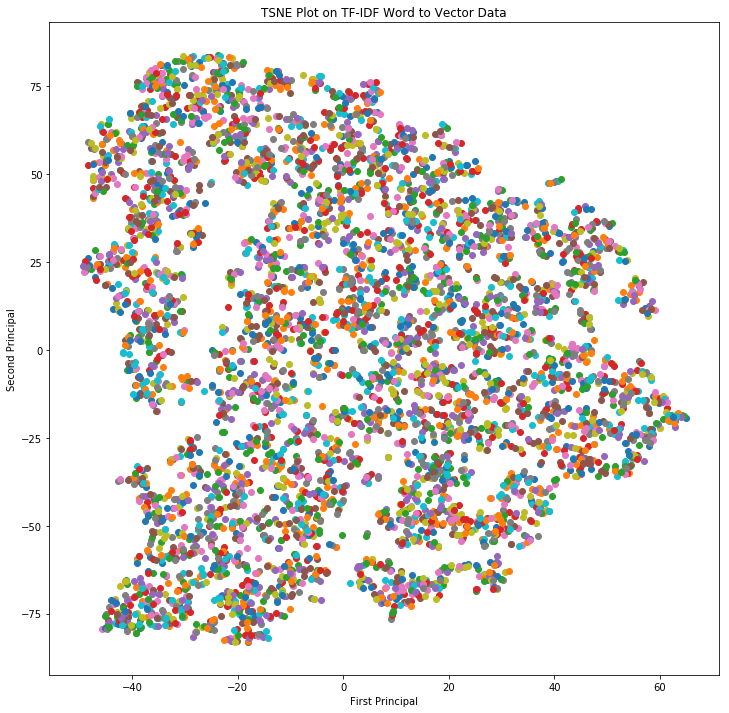

In [72]:
plt.figure(figsize=(12, 12)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
plt.title("TSNE Plot on TF-IDF Word to Vector Data") 
plt.xlabel("First Principal")
plt.ylabel("Second Principal")
plt.show()


#  Conclusion :

1. The positive and negative reviews are not linearly separable even after applying TSNE
2. We observe few outliers when TSNE was applied on Bags of Words.
3. In case of Word2Vec  we can see small clusters of similar reviews though clusters are not very prominent.